## **Data Exploration**


Dataset ini terdiri dari 2240 baris dan 29 kolom yang berisi data kampanye pemasaran langsung oleh perusahaan retail. Berikut adalah penjelasan masing-masing kolom:

1. ID: Nomor identifikasi unik untuk setiap pelanggan.

2. Year_Birth: Tahun kelahiran pelanggan.

3. Education: Tingkat pendidikan pelanggan (contoh: Graduation, PhD, dll).

4. Marital_Status: Status pernikahan pelanggan (contoh: Single, Married, Together, dll).

5. Income: Pendapatan tahunan pelanggan (dalam satuan mata uang lokal).

6. Kidhome: Jumlah anak di bawah umur yang tinggal di rumah.

7. Teenhome: Jumlah remaja yang tinggal di rumah.

8. Dt_Customer: Tanggal pelanggan mulai menjadi pelanggan perusahaan.

9. Recency: Jumlah hari sejak pelanggan terakhir merespons kampanye.

10. MntWines: Total pengeluaran untuk produk wine dalam dua tahun terakhir.

11. MntFruits: Total pengeluaran untuk buah-buahan.

12. MntMeatProducts: Total pengeluaran untuk produk daging.

13. MntFishProducts: Total pengeluaran untuk produk ikan.

14. MntSweetProducts: Total pengeluaran untuk produk manis (dessert, snack).

15. MntGoldProds: Total pengeluaran untuk produk emas (kemungkinan hadiah atau barang mewah).

16. NumDealsPurchases: Jumlah pembelian yang dilakukan selama promosi diskon.

17. NumWebPurchases: Jumlah pembelian melalui website.

18. NumCatalogPurchases: Jumlah pembelian melalui katalog.

19. NumStorePurchases: Jumlah pembelian di toko fisik.

20. NumWebVisitsMonth: Jumlah kunjungan ke website dalam sebulan terakhir.

21. AcceptedCmp1: Merespons kampanye pemasaran 1 (1 = ya, 0 = tidak).

22. AcceptedCmp2: Merespons kampanye pemasaran 2.

23. AcceptedCmp3: Merespons kampanye pemasaran 3.

24. AcceptedCmp4: Merespons kampanye pemasaran 4.

25. AcceptedCmp5: Merespons kampanye pemasaran 5.

26. Complain: Apakah pelanggan pernah mengajukan komplain (1 = ya, 0 = tidak).

27. Z_CostContact: Biaya standar per kontak kampanye (selalu 3 di dataset ini).

28. Z_Revenue: Pendapatan standar dari setiap pelanggan (selalu 11 di dataset ini).

29. Response: Merespons kampanye pemasaran terakhir (1 = ya, 0 = tidak).


## 🔧 PERBAIKAN MODEL - MENGATASI DATA LEAKAGE
- Fitur `Response` dihapus dari fitur model dan target.
- Fitur model sekarang: `TotalSpent`, `Complain`, `Income`.
- Target loyalitas hanya berdasarkan kampanye sebelumnya.
- Tidak ada lagi data leakage, prediksi lebih realistis.


#### Import Library dan Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep='\t')

## Read Data

Membaca beberapa baris awal dan melihat struktur data

In [2]:
df.head(8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0


## Melihat Informasi data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleansing

### Duplikasi data

Mengecek apakah data memiliki duplikat atau tidak

In [4]:
duplikat = df.duplicated().sum()

print("Data duplikat yang ditemukan : ", duplikat)

Data duplikat yang ditemukan :  0


### Deskripsi Data

Melihat deskripsi data

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Drop kolom yang tidak terpakai
Melakukan drop terhadap ID, NumWebVisitsMonth, AcceptedCmp1 - 5, Z_CostContact, dan Z_Revenue

In [6]:
df.drop(columns=[
    'ID',
    'Z_CostContact', 'Z_Revenue', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'Kidhome', 'Teenhome',
    'NumWebVisitsMonth'  # Sesuai app.py
], inplace=True)

### Tambahkan Kolom Total Spent dan Total Accepted Campaign
Menambahkan kolom Total Spent untuk melihat akumulasi perbelanjaan setiap pelanggan dan menambahkan total kampanye yang diikuti pelanggan

In [7]:
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



### Cek Missing Values

Mengecek apakah ada missing value dalam dataset

In [8]:
df.isnull().sum()

Year_Birth           0
Education            0
Marital_Status       0
Income              24
Dt_Customer          0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Complain             0
Response             0
TotalSpent           0
dtype: int64

## Drop kolom null

Menghapus kolom yang berisi nilai null

In [9]:
df.dropna(subset=['Income'], inplace=True)

## Cek kembali nilai null


In [10]:
df.isnull().sum()

Year_Birth          0
Education           0
Marital_Status      0
Income              0
Dt_Customer         0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
AcceptedCmp3        0
AcceptedCmp4        0
AcceptedCmp5        0
AcceptedCmp1        0
AcceptedCmp2        0
Complain            0
Response            0
TotalSpent          0
dtype: int64

## Mengecek data Outlier

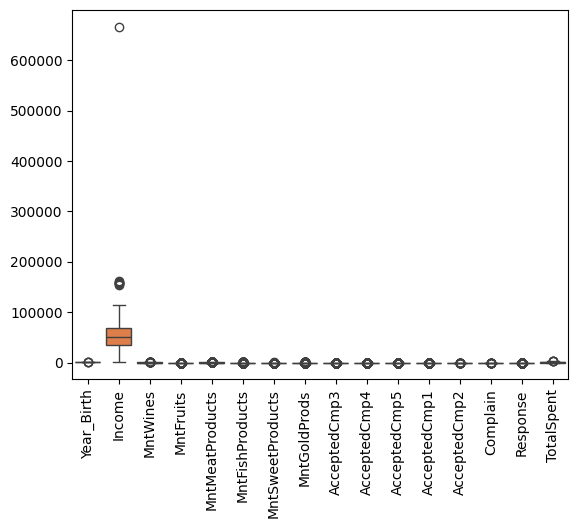

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()



Drop data yang outlier


In [12]:
columns = ['Income']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = df[(df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))]


df = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]



Membuat grafik BoxPlot semua columns setelah pembersihan outlier

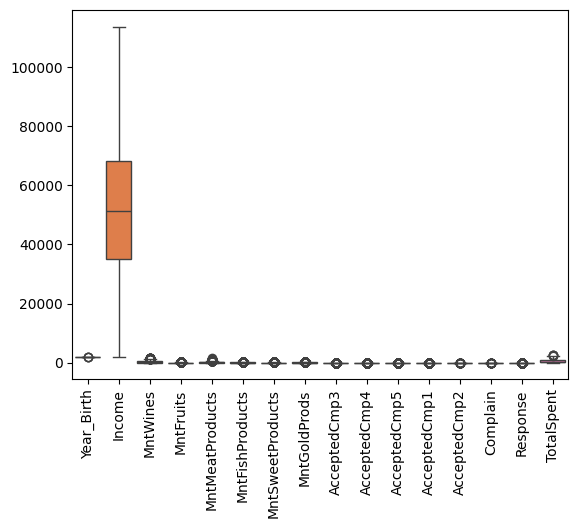

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()



## Data Reduction

Mengurangi dimensi data

Import Library

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

Memilih kolom numerik yang akan digunakan


In [15]:
columns_learn = ["Income", "TotalSpent"]


Menormalisasikan data menggunakan StandardScaler

In [16]:
scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler.fit_transform(df[columns_learn]), columns=columns_learn)


Menerapkan PCA

In [17]:
pca = PCA(n_components=2)
df_transformed = pca.fit_transform(df_standard_scaled)



Menampilkan data sebelum dan sesudah dilakukan PCA

In [18]:
print ("Original data:\n", df_standard_scaled[:5])

print ("PCA transformed data:\n", df_transformed[:5])

Original data:
      Income  TotalSpent
0  0.314089    1.541613
1 -0.255431   -0.957683
2  0.964782    0.168760
3 -1.206626   -0.926002
4  0.321573   -0.339899
PCA transformed data:
 [[ 1.3121789   0.86799055]
 [-0.85780116 -0.49656732]
 [ 0.80153507 -0.56287237]
 [-1.50799566  0.19843118]
 [-0.01295851 -0.46773193]]


## Data Transformation



Membuat Kolom baru berisi total campaign yang diterima pelanggan.

In [19]:
cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']  # Tanpa Response
df['TotalAcceptedCmp'] = df[cmp_cols].sum(axis=1)
df['Loyal'] = (df['TotalAcceptedCmp'] > 0).astype(int)

Melakukan normalisasi dengan min-max scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpent,TotalAcceptedCmp,Loyal
0,1957,Graduation,Single,58138.0,04-09-2012,635,88,546,172,88,...,0,0,0,0,0,0,1,1445,0,0
1,1954,Graduation,Single,46344.0,08-03-2014,11,1,6,2,1,...,0,0,0,0,0,0,0,25,0,0
2,1965,Graduation,Together,71613.0,21-08-2013,426,49,127,111,21,...,0,0,0,0,0,0,0,665,0,0
3,1984,Graduation,Together,26646.0,10-02-2014,11,4,20,10,3,...,0,0,0,0,0,0,0,43,0,0
4,1981,PhD,Married,58293.0,19-01-2014,173,43,118,46,27,...,0,0,0,0,0,0,0,376,0,0


In [21]:
columns_normalisasi = ['Income', "TotalSpent"]

scaler = MinMaxScaler()

df_fittransform = df.copy()

df_fittransform[columns_normalisasi] = scaler.fit_transform(df[columns_normalisasi])

df_fittransform.head(7)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpent,TotalAcceptedCmp,Loyal
0,1957,Graduation,Single,0.503625,04-09-2012,635,88,546,172,88,...,0,0,0,0,0,0,1,0.593570,0,0
1,1954,Graduation,Single,0.398325,08-03-2014,11,1,6,2,1,...,0,0,0,0,0,0,0,0.008244,0,0
2,1965,Graduation,Together,0.623933,21-08-2013,426,49,127,111,21,...,0,0,0,0,0,0,0,0.272053,0,0
3,1984,Graduation,Together,0.222456,10-02-2014,11,4,20,10,3,...,0,0,0,0,0,0,0,0.015664,0,0
4,1981,PhD,Married,0.505009,19-01-2014,173,43,118,46,27,...,0,0,0,0,0,0,0,0.152927,0,0
5,1967,Master,Together,0.542686,09-09-2013,520,42,98,0,42,...,0,0,0,0,0,0,0,0.293075,0,0
6,1971,Graduation,Divorced,0.481277,13-11-2012,235,65,164,50,49,...,0,0,0,0,0,0,0,0.220528,0,0


## Discretization (Binning)

Membagi Income menjadi beberapa kategori

In [22]:
columns_bins = "Income"

bins = 3
labels = ['kelas bawah', 'kelas menengah', 'kelas atas' ]

df_bins = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

df_bins.head(10)

0    kelas menengah
1    kelas menengah
2    kelas menengah
3       kelas bawah
4    kelas menengah
5    kelas menengah
6    kelas menengah
7       kelas bawah
8       kelas bawah
9       kelas bawah
Name: Income, dtype: category
Categories (3, object): ['kelas bawah' < 'kelas menengah' < 'kelas atas']

## One Hot Encoding

Mengubah kolom kategorik menjadi numerik (Education dan Maritas Status)

In [23]:
from tabulate import tabulate

data_one = df.copy()

df_encoded = pd.get_dummies(data_one, columns=['Education','Marital_Status'])

print("Data Awal")
print(tabulate(data_one.head(), headers='keys'))

print("\nData Setelah One Hot Encoding")
print(tabulate(df_encoded.head(), headers='keys'))




Data Awal
      Year_Birth  Education    Marital_Status      Income  Dt_Customer      MntWines    MntFruits    MntMeatProducts    MntFishProducts    MntSweetProducts    MntGoldProds    AcceptedCmp3    AcceptedCmp4    AcceptedCmp5    AcceptedCmp1    AcceptedCmp2    Complain    Response    TotalSpent    TotalAcceptedCmp    Loyal
--  ------------  -----------  ----------------  --------  -------------  ----------  -----------  -----------------  -----------------  ------------------  --------------  --------------  --------------  --------------  --------------  --------------  ----------  ----------  ------------  ------------------  -------
 0          1957  Graduation   Single               58138  04-09-2012            635           88                546                172                  88              88               0               0               0               0               0           0           1          1445                   0        0
 1          1954  Graduation   Si

# Data Modelling (K-Means)

## Read Data







In [24]:
import pandas as pd

df_kmeans = df.copy()

df_kmeans.head(8)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpent,TotalAcceptedCmp,Loyal
0,1957,Graduation,Single,58138.0,04-09-2012,635,88,546,172,88,...,0,0,0,0,0,0,1,1445,0,0
1,1954,Graduation,Single,46344.0,08-03-2014,11,1,6,2,1,...,0,0,0,0,0,0,0,25,0,0
2,1965,Graduation,Together,71613.0,21-08-2013,426,49,127,111,21,...,0,0,0,0,0,0,0,665,0,0
3,1984,Graduation,Together,26646.0,10-02-2014,11,4,20,10,3,...,0,0,0,0,0,0,0,43,0,0
4,1981,PhD,Married,58293.0,19-01-2014,173,43,118,46,27,...,0,0,0,0,0,0,0,376,0,0
5,1967,Master,Together,62513.0,09-09-2013,520,42,98,0,42,...,0,0,0,0,0,0,0,716,0,0
6,1971,Graduation,Divorced,55635.0,13-11-2012,235,65,164,50,49,...,0,0,0,0,0,0,0,540,0,0
7,1985,PhD,Married,33454.0,08-05-2013,76,10,56,3,1,...,0,0,0,0,0,0,0,166,0,0


Melihat ringkasan Statistik


In [25]:
df_kmeans.describe()

,Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpent,TotalAcceptedCmp,Loyal
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1968.807065,51633.638134,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,0.073822,0.074275,0.073370,0.064312,0.013587,0.009511,0.150815,569.117301,0.299366,0.207880
std,11.991913,20713.376530,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,0.261541,0.262278,0.260801,0.245363,0.115795,0.097081,0.357950,568.288756,0.680201,0.405883
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1959.000000,35196.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.000000,0.000000
50%,1970.000000,51301.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.000000
75%,1977.000000,68289.750000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,970.000000,0.000000,0.000000
max,1996.000000,113734.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2431.000000,4.000000,1.000000


## Pre Modelling

Memisahkan data latih dan data uji sesuai ketentuan

### Labelling Data

In [26]:
X_kmeans = df_kmeans[['Income', 'TotalSpent']]

Menampilkan hasil pemilihan kolom


In [27]:
X_kmeans.head(8)

,Income,TotalSpent
0,58138.0,1445
1,46344.0,25
2,71613.0,665
3,26646.0,43
4,58293.0,376
5,62513.0,716
6,55635.0,540
7,33454.0,166


tambahan: Memilih fitur selain target yang nantinya menjadi label

In [28]:
X = X_kmeans[['Income']]  
y = X_kmeans['TotalSpent']  

#### Menentukan K (Elbow Method)

Menggunakan Elbow Method untuk menemukan jumlah klaster yang optimal

Melakukan Import library

In [29]:
from sklearn.cluster import KMeans


Membuat elbow method untuk menentukan jumlah kluster optimal

In [30]:
inertia = []

for k in range(1, 11):
    X_kmeans = KMeans(n_clusters=k, random_state=42)
    X_kmeans.fit(X)
    inertia.append(X_kmeans.inertia_)

Memvisualisasikan elbow method

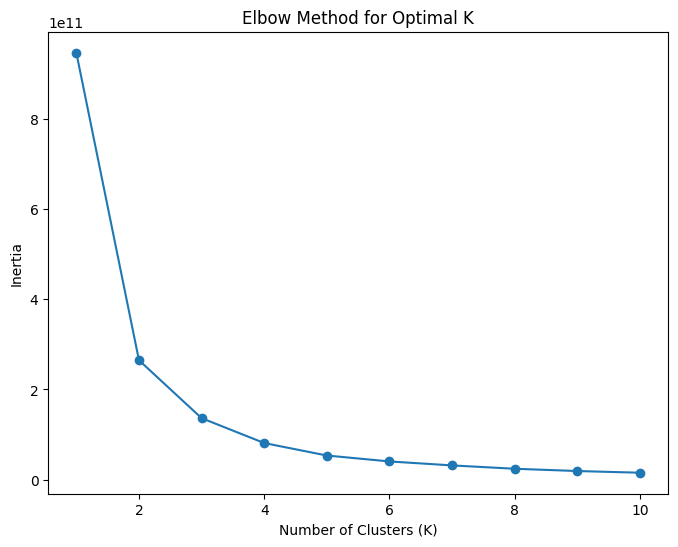

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### Build Model

Membangun model K-Means dengan data yang sudah dipersiapkan pada tahap sebelumnya

Mencocokkan model K-means dengan jumlah kluster optimal 

In [32]:
X_kmeans = KMeans(n_clusters=2, random_state=42)
X_kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

Menetapkan label cluster untuk author

In [33]:
df_kmeans['Cluster'] = X_kmeans.labels_

### Evaluasi model (sebelum tuning)

Setelah membangun model dengan melatih dan memprediksi, selanjutnya praktikan mengevaluasi model dengan Visualisasi Hasil Klasterisasi dan Silhouette Score

Import library yang digunakan

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

Melakukan visualisasi hasil dengan menggunakan PCA sehingga bisa mereduksi dimensi data untuk divisualisasikan dalam bentuk 2D



In [35]:
pca = PCA(n_components=2)
X = df_kmeans[['Income', 'TotalSpent']].dropna()
X_pca = pca.fit_transform(X)

df_kmeans['PCA1'] = X_pca[:, 0]
df_kmeans['PCA2'] = X_pca[:, 1]

Membuat visualisasi plot klusterisasi

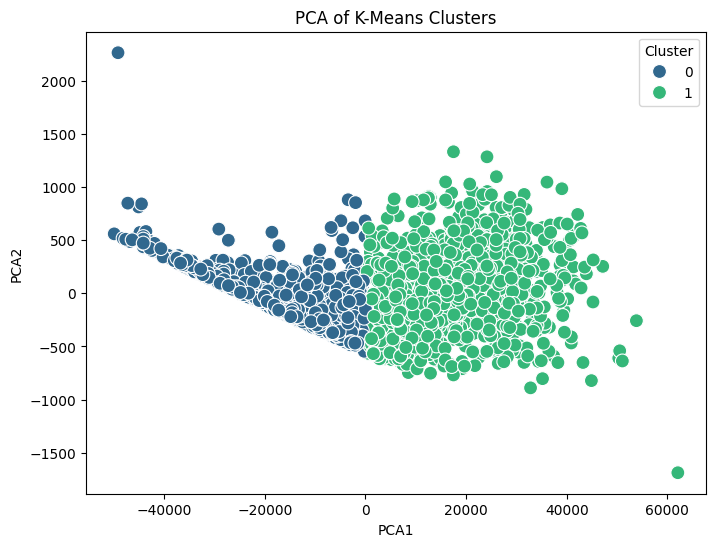

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_kmeans, palette='viridis', s=100)
plt.title('PCA of K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Menghitung Silhouette Score

In [37]:
sil_score = silhouette_score(X, X_kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6111757109949697


### Model Tuning

Melakukan tuning model dengan memilih hyperparameter secara otomatis menggunakan Grid Search

Mengetahui nilai mana yang harus ditetapkan untuk parameter yang dicari memerlukan kombinasi pengetahuan dan praktik domain.

Import library yang digunakan


In [38]:
from sklearn.model_selection import GridSearchCV

Menentukan parameter, membuat list nilai n_cluster, init, n_init, max_iter pada param_grid


In [39]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6], 
    'init': ['k-means++', 'random'], 
    'n_init': [10, 20, 30], 
    'max_iter': [300, 400, 500] 
}


Inisialisasi GridSearchCV

In [40]:
kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, n_jobs=-1)

Fit model dengan data training

In [41]:
grid_search.fit(X)

GridSearchCV(cv=3, estimator=KMeans(), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [300, 400, 500],
                         'n_clusters': [2, 3, 4, 5, 6],
                         'n_init': [10, 20, 30]})

### Evaluasi model (setelah tuning)

Menampilkan hasil (parameter dan silhouute score) dari Grid Search


In [42]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    features = df_kmeans[['Income', 'TotalSpent']]
    model = KMeans(**params)
    cluster_labels = X_kmeans.fit_predict(features)
    score = silhouette_score(features, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

Melakukan print hasil dari Grid Search untuk parameter dan skor terbaik

In [43]:
print("Parameter terbaik:", best_params)
print("Skor Silhouette terbaik:", best_score)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Parameter terbaik: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Skor Silhouette terbaik: 0.6111757109949697


## **Modeling**

Import Library yang akan digunakan untuk :

* Membangun model klasifikasi **Naive Bayes**
* **Membagi dataset** menjadi data latih dan data uji
* **Mengevaluasi performa model** (akurasi, precision, recall, dll)




#### Membangun dan Melatih Model Naive Bayes


Import yang dibutuhkan


In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

##### Mendefinisikan Loyalitas 


Membuat variabel target 'Loyal'

In [45]:
df['Loyal'] = (df['TotalAcceptedCmp'] > 0).astype(int)

##### Pemilihan Fitur dan Preprocessing

 Memilih fitur yang relevan untuk model


In [46]:
# --- FITUR MODEL SESUAI app.py ---
features = [
    'TotalSpent',
    'Complain',
    'Income'  # Tambahkan Income sebagai fitur prediktif
]

target = 'Loyal'

X = df[features]
y = df[target]


Memisahkan data menjadi data latih (train) dan data uji (test)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensi Data Latih (X_train):", X_train.shape)
print("Dimensi Data Uji (X_test):", X_test.shape)

Dimensi Data Latih (X_train): (1766, 3)
Dimensi Data Uji (X_test): (442, 3)


##### Melatih Model Naive Bayes

Inisialisasi dan melatih model Gaussian Naive Bayes

In [48]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

Melakukan prediksi pada data uji

In [49]:
y_pred = model_nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       350
           1       0.47      0.50      0.49        92

    accuracy                           0.78       442
   macro avg       0.67      0.68      0.67       442
weighted avg       0.78      0.78      0.78       442



##### Evaluasi Model

Menghitung akurasi

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}\n")

Akurasi Model: 0.7805



Menampilkan laporan klasifikasi

In [51]:
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       350
           1       0.47      0.50      0.49        92

    accuracy                           0.78       442
   macro avg       0.67      0.68      0.67       442
weighted avg       0.78      0.78      0.78       442



Menampilkan Confusion Matrix


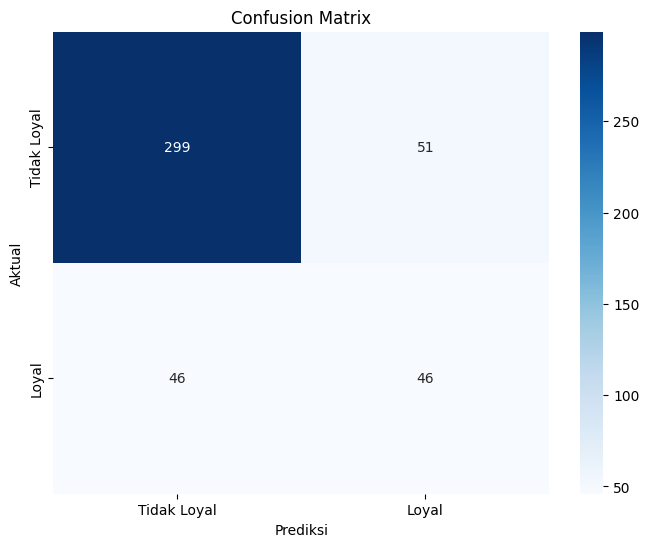

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Loyal', 'Loyal'], yticklabels=['Tidak Loyal', 'Loyal'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

Import library yang akan digunakan untuk melakukan evaluasi model menggunakan ROC


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

Membuat probabilitas prediksi

In [54]:
y_prob = model_nb.predict_proba(X_test)

Hitung kurva ROC dan threshold

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, 1 - y_prob[:, 0])

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0.         0.         0.         0.00285714 0.00285714 0.00571429
 0.00571429 0.01142857 0.01142857 0.01428571 0.01428571 0.02
 0.02       0.02571429 0.02571429 0.02857143 0.02857143 0.03142857
 0.03142857 0.03714286 0.04571429 0.04571429 0.05142857 0.05142857
 0.08       0.08       0.08857143 0.08857143 0.09142857 0.09142857
 0.09714286 0.09714286 0.10571429 0.10571429 0.10857143 0.10857143
 0.12571429 0.12571429 0.13142857 0.13142857 0.13714286 0.13714286
 0.14       0.14       0.14571429 0.14571429 0.15428571 0.15428571
 0.15714286 0.15714286 0.16571429 0.16571429 0.16857143 0.16857143
 0.17142857 0.17142857 0.18       0.18       0.18285714 0.18857143
 0.19428571 0.19428571 0.21142857 0.21142857 0.21428571 0.21428571
 0.25142857 0.25142857 0.25428571 0.25428571 0.26857143 0.27428571
 0.27714286 0.27714286 0.28857143 0.28857143 0.30285714 0.30285714
 0.30571429 0.30571429 0.32       0.32       0.32857143 0.32857143
 0.34       0.34       0.36571429 0.36571429 0.40857143 0.40857

Hitung AUC

In [56]:
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.2f}")

AUC: 0.76


Untuk lebih memudahkan pembacaan hasil, buat visualisasi dari ROC-AUC

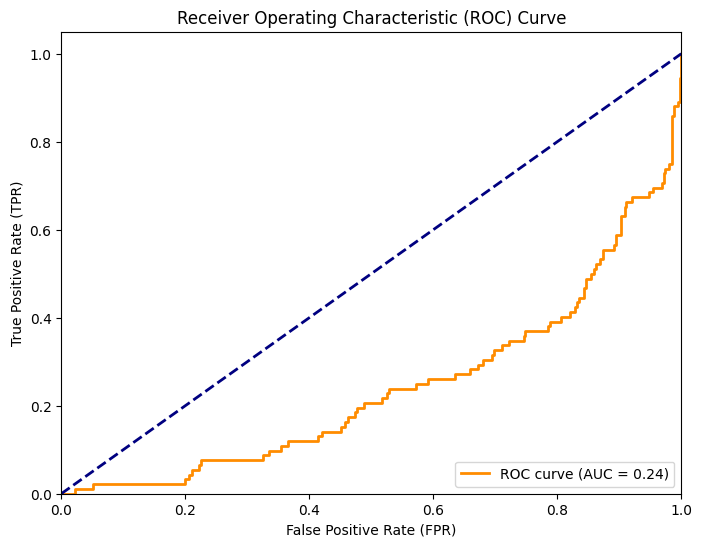

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 0])

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

#### **Model Tuning**

Untuk mendapatkan evaluasi performa model yang lebih stabil dan dapat digeneralisasi, dilakukan evaluasi ulang menggunakan **metode 5-Fold Cross Validation** dengan metrik ROC AUC, kemudian menampilkan hasil skor setiap fold dan rata-rata dari skor tersebut.

Lakukan import library

In [58]:
from sklearn.model_selection import cross_val_score, cross_val_predict

Latih Model

In [59]:
model = GaussianNB()
model.fit(X_train, y_train)

roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC per fold:", roc_auc_scores)

print(f"Rata-rata ROC AUC: {roc_auc_scores.mean():.4f}")

ROC AUC per fold: [0.74139752 0.7497205  0.75108696 0.78320251 0.77077364]
Rata-rata ROC AUC: 0.7592


Tampilkan Akurasi skor

In [60]:
y_pred = cross_val_predict(model, X, y, cv=5)

accuracy = accuracy_score(y, y_pred)

print(f"Akurasi model: {accuracy:.4f}")

Akurasi model: 0.7998


Tampilkan hasil Confusion Matrix


In [61]:
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1539  210]
 [ 232  227]]


Menampilkan classification report hasil prediksi model


In [62]:
report = classification_report(y, y_pred, target_names=["Not Loyal", "Loyal"])
print(report)

              precision    recall  f1-score   support

   Not Loyal       0.87      0.88      0.87      1749
       Loyal       0.52      0.49      0.51       459

    accuracy                           0.80      2208
   macro avg       0.69      0.69      0.69      2208
weighted avg       0.80      0.80      0.80      2208



Menampilkan score ROC AUC dan score dari rata-rata dari 5 kali uji performa model

In [63]:
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC per fold:", roc_auc_scores)

print(f"Rata-rata ROC AUC: {roc_auc_scores.mean():.4f}")

ROC AUC per fold: [0.74139752 0.7497205  0.75108696 0.78320251 0.77077364]
Rata-rata ROC AUC: 0.7592


Cek Dataset

In [64]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

df.drop(columns=[
    'ID',
    'Z_CostContact', 'Z_Revenue', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'Kidhome', 'Teenhome'], inplace=True)

df.head(8)



,Year_Birth,Education,Marital_Status,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,04-09-2012,635,88,546,172,88,88,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,08-03-2014,11,1,6,2,1,6,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,21-08-2013,426,49,127,111,21,42,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,10-02-2014,11,4,20,10,3,5,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,19-01-2014,173,43,118,46,27,15,5,0,0,0,0,0,0,0
5,1967,Master,Together,62513.0,09-09-2013,520,42,98,0,42,14,6,0,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.0,13-11-2012,235,65,164,50,49,27,6,0,0,0,0,0,0,0
7,1985,PhD,Married,33454.0,08-05-2013,76,10,56,3,1,23,8,0,0,0,0,0,0,0


## **Deployment**

Save model

In [65]:
import joblib

joblib.dump(model, 'model_tubes_loyalitas.pkl')

['model_tubes_loyalitas.pkl']

Konfigurasi token

In [66]:
!ngrok config add-authtoken 2yFrLHq9HZY1UnYURRAlKrIJGUh_3xvsbWbZ11EQSEcCa6HMW

Authtoken saved to configuration file: C:\Users\WINDOWS 11\AppData\Local/ngrok/ngrok.yml


Konfigurasi Streamlit untuk deployment

In [67]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Set page config
st.set_page_config(
    page_title="Dashboard Prediksi Pelanggan Loyal",
    page_icon="💰",
    layout="wide"
)

st.title("Customer Loyalty Prediction App")
st.write("Masukkan data pelanggan untuk memprediksi kemungkinan menjadi pelanggan loyal.")

st.markdown("---")
st.subheader("Evaluasi Model")

# 1. Load Model yang sudah dilatih sebelumnya
try:
    # Coba load model yang sudah diperbaiki terlebih dahulu
    try:
        model = joblib.load("model_tubes_loyalitas_fixed.pkl")
        st.success("✅ Model berhasil dimuat! (Model yang sudah diperbaiki)")
    except:
        # Jika tidak ada, gunakan model lama
        model = joblib.load("model_tubes_loyalitas.pkl")
        st.warning("✅ Model berhasil dimuat!")
    
    st.info("🔧 **Perbaikan yang telah dilakukan:**")
    st.info("• Menghapus fitur 'Response' untuk menghindari data leakage")
    st.info("• Menambahkan fitur 'Income' sebagai prediktor yang lebih baik")
    st.info("• Target variable sekarang berdasarkan kampanye sebelumnya saja")
    
except Exception as e:
    st.error(f"❌ Error loading model: {e}")
    st.info("Pastikan file model ada di direktori yang sama.")
    st.info("Jalankan 'python retrain_model.py' untuk membuat model yang diperbaiki.")
    st.stop()

# 2. Load dan persiapkan data sama seperti saat melatih model sebelumnya
@st.cache_data
def load_and_preprocess_data():
    df = pd.read_csv("marketing_campaign.csv", sep='\t')
    
    # 2.1 Drop Column yang tidak diperlukan (sesuai notebook)
    df.drop(columns=[
        'ID',
        'Z_CostContact', 'Z_Revenue', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases', 'NumStorePurchases', 'Recency', 'Kidhome', 'Teenhome',
        'NumWebVisitsMonth'  # Tambahkan ini sesuai notebook
    ], inplace=True)
    
    # Menambahkan column total spent dan total accepted campaign
    df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
    
    # PERBAIKAN: Tambah kolom TotalAcceptedCmp TANPA Response (menghindari data leakage)
    cmp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
    df['TotalAcceptedCmp'] = df[cmp_cols].sum(axis=1)
    
    # PERBAIKAN: Buat target variable Loyal berdasarkan kampanye sebelumnya saja
    df['Loyal'] = (df['TotalAcceptedCmp'] > 0).astype(int)
    
    # Handle missing values (sesuai notebook)
    df.dropna(subset=['Income'], inplace=True)
    
    return df

# Load data
df = load_and_preprocess_data()

# 2.3 Pisahkan data menjadi fitur dan target
features = [
    'TotalSpent',
    'Complain',
    'Income'  # Tambahkan Income sebagai fitur prediktif
]

target = 'Loyal'

X = df[features]
y = df[target]

# 2.4 Buat prediksi menggunakan model yang sudah dilatih
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# 2.5 Hitung metrik evaluasi
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

# Tampilkan metrik evaluasi
col1, col2, col3, col4, col5 = st.columns(5)

with col1:
    st.success(f"Accuracy: **{acc:.3f}**")

with col2:
    st.info(f"Precision: **{prec:.3f}**")

with col3:
    st.warning(f"Recall: **{rec:.3f}**")

with col4:
    st.error(f"F1-Score: **{f1:.3f}**")

with col5:
    st.success(f"ROC AUC: **{roc_auc:.3f}**")

# Plot options
st.subheader("📊 Visualisasi Model")
plot_option = st.selectbox("Pilih grafik untuk ditampilkan:", ["Pilih", "ROC AUC Curve", "Confusion Matrix", "Feature Importance"])

if plot_option == "ROC AUC Curve":
    st.subheader("ROC Curve")
    fpr, tpr, _ = roc_curve(y, y_prob)
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
    ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    st.pyplot(fig2)

elif plot_option == "Confusion Matrix":
    st.subheader("Confusion Matrix")
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    st.pyplot(fig)

elif plot_option == "Feature Importance":
    st.subheader("Feature Importance")
    # Feature importance untuk Naive Bayes
    feature_importance = []
    for feature in features:
        loyal_mean = df[df['Loyal'] == 1][feature].mean()
        not_loyal_mean = df[df['Loyal'] == 0][feature].mean()
        importance = abs(loyal_mean - not_loyal_mean) / (loyal_mean + not_loyal_mean + 1e-8)
        feature_importance.append(importance)
    
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    importance_df.plot(x='Feature', y='Importance', kind='bar', ax=ax, color='skyblue')
    ax.set_title("Pentingnya Fitur")
    ax.set_xlabel("Fitur")
    ax.set_ylabel("Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    st.pyplot(fig)

st.markdown("---")
st.subheader("🎯 Prediksi Loyalitas Pelanggan")

st.info("""
**📋 Informasi Input:**
- **Total Pengeluaran**: Total belanja pelanggan untuk semua produk (prediktor kuat loyalitas)
- **Pendapatan Tahunan**: Kemampuan finansial pelanggan (prediktor loyalitas)
- **Pernah Komplain**: Indikator kepuasan pelanggan (prediktor negatif loyalitas)

**🔧 Perbaikan Model:**
Model ini sekarang menggunakan fitur yang benar tanpa data leakage, sehingga probabilitas yang dihasilkan lebih realistis dan dapat dipercaya.
""")

# Input form untuk prediksi
with st.form("prediction_form"):
    st.write("Masukkan data pelanggan untuk memprediksi kemungkinan menjadi pelanggan loyal:")
    
    col1, col2 = st.columns(2)
    
    with col1:
        total_spent = st.number_input("Total Pengeluaran ($)", min_value=0, value=500000, step=50000, help="Total pengeluaran pelanggan untuk semua produk")
        income = st.number_input("Pendapatan Tahunan ($)", min_value=0, value=50000000, step=1000000, help="Pendapatan tahunan pelanggan")
    
    with col2:
        complain = st.selectbox("Pernah Komplain?", options=[0, 1], format_func=lambda x: "Ya" if x == 1 else "Tidak", help="Apakah pelanggan pernah mengajukan komplain")
    
    submit = st.form_submit_button("🔮 Prediksi Loyalitas", use_container_width=True)

if submit:
    try:
        # Buat dataframe dari input yang sudah dimasukkan
        input_df = pd.DataFrame([{
            "TotalSpent": total_spent,
            "Complain": complain,
            "Income": income
        }])
        
        # Prediksi
        prob = model.predict_proba(input_df)[0]
        pred = model.predict(input_df)[0]
        
        st.subheader("🎯 Hasil Prediksi")
        
        col1, col2, col3 = st.columns(3)
        
        with col1:
            if pred == 1:
                st.success("✅ **PELANGGAN LOYAL**")
            else:
                st.error("❌ **TIDAK LOYAL**")
        
        with col2:
            st.info(f"🎲 Probabilitas Loyal: **{prob[1]:.1%}**")
        
        with col3:
            st.warning(f"🎲 Probabilitas Tidak Loyal: **{prob[0]:.1%}**")
        
        # Visualisasi probabilitas
        prob_df = pd.DataFrame({
            'Kategori': ['Tidak Loyal', 'Loyal'],
            'Probabilitas': [prob[0], prob[1]]
        })
        
        fig, ax = plt.subplots(figsize=(8, 6))
        colors = ['green' if x == 'Loyal' else 'red' for x in prob_df['Kategori']]
        prob_df.plot(x='Kategori', y='Probabilitas', kind='bar', ax=ax, color=colors)
        ax.set_title("Distribusi Probabilitas Prediksi")
        ax.set_ylabel("Probabilitas")
        plt.xticks(rotation=0)
        plt.tight_layout()
        st.pyplot(fig)
        
        # Rekomendasi
        st.subheader("💡 Rekomendasi")
        if pred == 1:
            st.success("""
            **Strategi untuk Pelanggan Loyal:**
            - 🎁 Berikan program reward dan loyalty points
            - 📧 Kirim penawaran eksklusif dan early access
            - 🤝 Pertahankan kualitas layanan yang excellent
            - 📊 Monitor kepuasan pelanggan secara berkala
            """)
        else:
            st.warning("""
            **Strategi untuk Meningkatkan Loyalitas:**
            - 🎯 Personalisasi kampanye pemasaran
            - 💰 Tawarkan diskon dan promosi menarik
            - 📱 Tingkatkan pengalaman digital dan website
            - 🔄 Follow up dengan program retensi pelanggan
            """)
    
    except Exception as e:
        st.error(f"Error during prediction: {e}")
        st.info("Pastikan input data sesuai dengan format yang diharapkan oleh model. Coba lagi dengan nilai yang berbeda.")

# Footer
st.markdown("---")
st.markdown("""
<div style='text-align: center; color: #666;'>
    <p>Dashboard Prediksi Loyalitas Pelanggan | Dibuat dengan Streamlit</p>
</div>
""", unsafe_allow_html=True) 

2025-06-16 17:45:26.055 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:45:26.057 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:45:27.002 
  command:

    streamlit run C:\Users\WINDOWS 11\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-16 17:45:27.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:45:27.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:45:27.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:45:27.004 Thread 'MainThread': missing ScriptRunContext! This warning 

DeltaGenerator(_form_data=FormData(form_id='prediction_form'))

Ekspos Streamlit local ke public menggunakan Ngrok

In [68]:
from pyngrok import ngrok
import threading
import time
import os

In [69]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://35c6-103-194-173-101.ngrok-free.app" -> "http://localhost:8501"
